In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### NYC Restaurants

<font face="Tahoma" size = 3> Setup

In [69]:
df = pd.read_csv("NYC_Restaurants.csv", dtype=str)
df.head(2)

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE
0,0,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,06C,Food not protected from potential source of co...,Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection
1,1,30112340,WENDY'S,BROOKLYN,469,FLATBUSH AVENUE,11225,7182875005,Hamburgers,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,8,A,12/30/2014,02/12/2015,Cycle Inspection / Re-inspection


<font face="Tahoma" size = 3> Q1. Create a unique name for each restaurant.

In [70]:
df.isnull().sum(axis = 0)

Unnamed: 0                   0
CAMIS                        0
DBA                          0
BORO                         0
BUILDING                     0
STREET                       0
ZIPCODE                      0
PHONE                        0
CUISINE DESCRIPTION          0
INSPECTION DATE              0
ACTION                       0
VIOLATION CODE             577
VIOLATION DESCRIPTION      601
CRITICAL FLAG                0
SCORE                     2990
GRADE                    23624
GRADE DATE               24490
RECORD DATE                  0
INSPECTION TYPE              0
dtype: int64

In [71]:
cols = ['DBA','BUILDING','STREET','ZIPCODE','BORO']
df['Restaurant'] = df[cols].agg(' '.join,axis=1)

In [72]:
df['Restaurant'][:10]

0           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
1           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
2           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
3           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
4           WENDY'S 469 FLATBUSH AVENUE 11225 BROOKLYN
5        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
6        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
7        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
8        TOV KOSHER KITCHEN 97-22 63 ROAD 11374 QUEENS
9    BRUNOS ON THE BOULEVARD 8825 ASTORIA BOULEVARD...
Name: Restaurant, dtype: object

<font face="Tahoma" size = 3>Q2. How many restaurants are included in the data?

In [73]:
df['Restaurant'].nunique()

10114

In [100]:
#df['DBA'].nunique()

<font face="Tahoma" size = 3>Q3. How many chains are there? 

In [74]:
df[df['Restaurant'].map(df['Restaurant'].value_counts() > 1)]['DBA'].nunique()


7824

<font face="Tahoma" size = 3>Q4. Plot a bar graph of the top 20 most popular chains.

<AxesSubplot:>

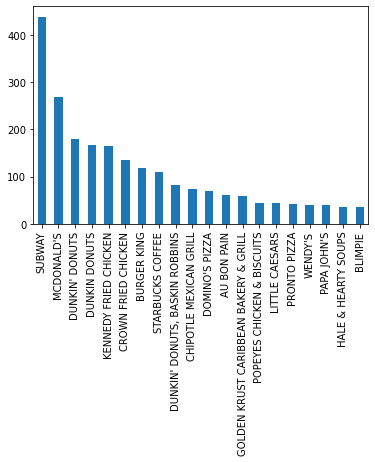

In [75]:
df[df['Restaurant'].map(df['Restaurant'].value_counts() > 1)]['DBA'].value_counts()[0:20].plot(kind='bar')

<font face="Tahoma" size = 3>Q5. What fraction of all restaurants are chain restaurants?

In [76]:
round(df[df['Restaurant'].map(df['Restaurant'].value_counts() > 1)]['DBA'].nunique() / df['Restaurant'].nunique(),2)

0.77

<font face="Tahoma" size = 3>Q6. Plot the number of non-chain restaurants in each boro

In [92]:
chains = df[df['Restaurant'].map(df['Restaurant'].value_counts() > 1)][['DBA','Restaurant']]

In [93]:
chains['DBA'].nunique()

7824

In [94]:
chains['Restaurant'].nunique()

8849

In [101]:
nonchains = df[~(df['DBA'].isin(chains['DBA']))]

In [106]:
nonchains['DBA'].value_counts()
#nonchains['DBA'].nunique()

PHOEBE'S                               2
CREDIT SUISSE                          2
LOESER'S HEBREW NATIONAL               1
EAST SIDE BILLARD                      1
CHECKER'S                              1
                                      ..
NEW LINE INTERNET CAFE                 1
DISNEY ABC CAFETERIA                   1
ENDLESS SUMMER                         1
PRABHU KIRPA SWEETS AND RESTAURANT     1
NORTH SHORE TOWERS AND COUNTRY CLUB    1
Name: DBA, Length: 992, dtype: int64

In [107]:
nonchains['Restaurant'].value_counts()
#nonchains['Restaurant'].nunique()

BUBBLE CREPE 70-23 AUSTIN STREET 11375 QUEENS                                                 1
WILLIAM GREENBERG DESSERT 1 WEST   58 STREET 10019 MANHATTAN                                  1
MI RANCHITO MEXICAN RESTAURANT 1468 ST NICHOLAS AVENUE 10033 MANHATTAN                        1
GOLDEN CRUST PIZZA AND GRILL 9023 37 AVENUE 11372 QUEENS                                      1
Jimmy Deli Grill 2254       EAST TREMONT AVENUE                                10462 BRONX    1
                                                                                             ..
GOLDEN STAR 2110 CLOVE RD 10305 STATEN ISLAND                                                 1
EAST VILLAGE TAVERN 158 AVENUE C 10009 MANHATTAN                                              1
CHAN'S VILLAGE 1328 METROPOLITAN AVENUE 10462 BRONX                                           1
CHOP SHOP 254        10 AVENUE                                          10001 MANHATTAN       1
IL CAFFE LATTE 2 458 WEST 145TH STREET 1

In [111]:
df[df['BORO'] == "Missing"][0:2]

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Restaurant
11196,11196,41197540,DJERDAN,Missing,9,E WESLEY ST,07606,7184843180,Mediterranean,12/30/2014,Violations were cited in the following area(s).,08C,Pesticide use not in accordance with label or ...,Not Critical,6,A,12/30/2014,02/12/2015,Cycle Inspection / Initial Inspection,DJERDAN 9 E WESLEY ST 07606 Missing
11197,11197,41197540,DJERDAN,Missing,9,E WESLEY ST,07606,7184843180,Mediterranean,12/30/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,6,A,12/30/2014,02/12/2015,Cycle Inspection / Initial Inspection,DJERDAN 9 E WESLEY ST 07606 Missing


In [118]:
df_subset = df[(df['DBA'].isin(nonchains['DBA'].value_counts().index))]
df_subset = df_subset[df_subset['BORO'] != "Missing"]

<AxesSubplot:>

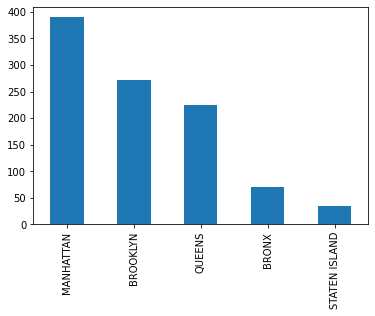

In [121]:
df_subset['BORO'].value_counts().plot(kind='bar')

In [128]:
df_subset

,Unnamed: 0,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,VIOLATION DESCRIPTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION TYPE,Restaurant
30,30,40361521,GLORIOUS FOOD,MANHATTAN,522,EAST 74 STREET,10021,2127372140,American,11/24/2014,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,GLORIOUS FOOD 522 EAST 74 STREET 10021 MANHA...
41,41,40362264,P & S DELI GROCERY,MANHATTAN,730,COLUMBUS AVENUE,10025,2129323030,American,11/13/2014,Violations were cited in the following area(s).,20F,Current letter grade card not posted.,Not Critical,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,P & S DELI GROCERY 730 COLUMBUS AVENUE 10025 M...
104,104,40365043,SHELL LANES,BROOKLYN,1,BOUCK COURT,11223,7183366700,American,12/10/2014,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,A,12/10/2014,02/12/2015,Cycle Inspection / Initial Inspection,SHELL LANES 1 BOUCK COURT 11223 BROOKLYN
121,121,40365226,NOSTRAND DONUT SHOP,BROOKLYN,1449,NOSTRAND AVENUE,11226,7188263008,Donuts,11/19/2014,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,NOSTRAND DONUT SHOP 1449 NOSTRAND AVENUE 11226...
131,131,40365414,LE PERIGORD,MANHATTAN,405,EAST 52 STREET,10022,2127556244,French,11/20/2014,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,NaN,NaN,NaN,02/12/2015,Administrative Miscellaneous / Initial Inspection,LE PERIGORD 405 EAST 52 STREET 10022 MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44617,44617,50018885,MANHATTANVILLE COFFEE,BROOKLYN,167,ROGERS AVE,11216,7189540954,Café/Coffee/Tea,01/21/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,3,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,MANHATTANVILLE COFFEE 167 ROGERS AVE 11216 BRO...
44618,44618,50018956,ROB & TONY'S PIZZERIA,QUEENS,6635,GRAND AVE ...,11378,7185050355,Pizza/Italian,01/23/2015,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,ROB & TONY'S PIZZERIA 6635 GRAND AVE ...
44621,44621,50019007,Andy's Cuisine Restaurant,BRONX,1444,WILLIAMSBRIDGE RD,10461,7186841511,Caribbean,01/29/2015,No violations were recorded at the time of thi...,NaN,NaN,Not Applicable,0,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,Andy's Cuisine Restaurant 1444 WILLIAMSBRIDGE ...
44627,44627,50019062,NEW WORLD FAST FOOD,QUEENS,4021,MAIN ST,11354,6462440901,Other,01/26/2015,Violations were cited in the following area(s).,10F,Non-food contact surface improperly constructe...,Not Critical,2,Not Yet Graded,NaN,02/12/2015,Pre-permit (Non-operational) / Initial Inspection,NEW WORLD FAST FOOD 4021 MAIN ST 11354 QUEENS


<font face="Tahoma" size = 3>Q7. Plot the fraction of non-chain restaurants in each boro

In [122]:
df_subset2 = df[(df['DBA'].isin(chains['DBA'].value_counts().index))]
df_subset2 = df_subset2[df_subset2['BORO'] != "Missing"]

In [130]:
df_subset['BORO'].value_counts().to_frame()

,BORO
MANHATTAN,390
BROOKLYN,272
QUEENS,224
BRONX,71
STATEN ISLAND,35


In [140]:
merged_df = df_subset2['BORO'].value_counts().to_frame().merge(df_subset['BORO'].value_counts().to_frame(), how='left', left_index=True,right_index=True).rename(columns={'BORO_x':'chains','BORO_y':'nonchains'})
merged_df

,chains,nonchains
MANHATTAN,17553,390
BROOKLYN,10869,272
QUEENS,10289,224
BRONX,3394,71
STATEN ISLAND,1507,35


<AxesSubplot:>

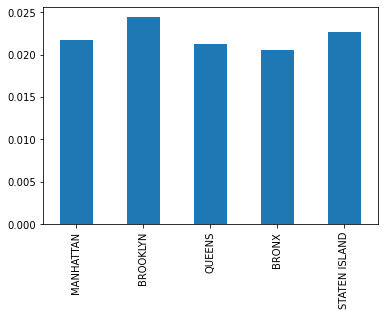

In [148]:
merged_df['nonchains_prop'] = merged_df['nonchains']/(merged_df['nonchains']+merged_df['chains'])
merged_df['nonchains_prop'].plot(kind='bar')

<AxesSubplot:>

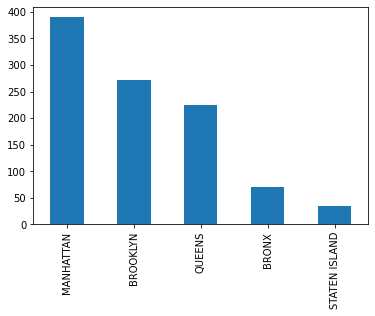

In [150]:
merged_df['nonchains'].plot(kind='bar')

Manhattan is the boro with the most independent restaurants, the same as the one with the highest ratio of independent restaurants!

<font face="Tahoma" size = 3>Q8. Plot the popularity of cuisines

<AxesSubplot:>

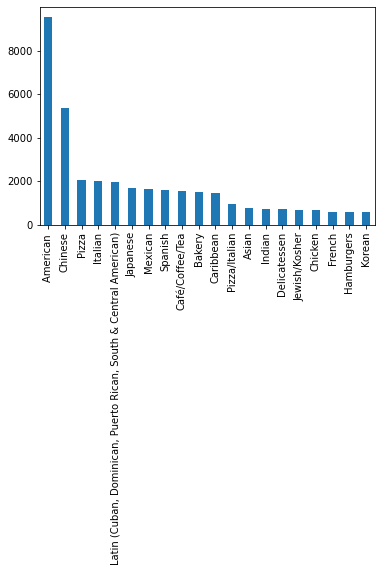

In [154]:
df['CUISINE DESCRIPTION'].value_counts()[0:20].plot(kind='bar')

<font face="Tahoma" size = 3>Q9. Plot the cuisines among restaurants which never got cited for violations

In [187]:
#Removing Null values since we aren't sure if they have been cited for violations or not
df_noviolation = df[~df[['Restaurant','CUISINE DESCRIPTION','VIOLATION CODE']]['VIOLATION CODE'].notnull()]

In [188]:
print(df_noviolation.shape)
df_noviolation = df_noviolation.drop_duplicates()
df_noviolation.shape

(577, 20)


(577, 20)

<AxesSubplot:>

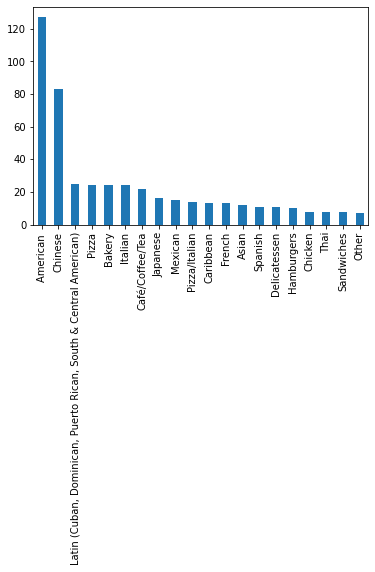

In [189]:
df_noviolation['CUISINE DESCRIPTION'].value_counts()[0:20].plot(kind='bar')

<font face="Tahoma" size = 3>Q10. What cuisines tend to be the “cleanest”

In [195]:
df_atleast20 = df[df['CUISINE DESCRIPTION'].isin( df['CUISINE DESCRIPTION'].value_counts()[0:20].index )]

In [196]:
df_atleast20['CUISINE DESCRIPTION'].value_counts()

American                                                            9522
Chinese                                                             5365
Pizza                                                               2041
Italian                                                             2017
Latin (Cuban, Dominican, Puerto Rican, South & Central American)    1959
Japanese                                                            1659
Mexican                                                             1645
Spanish                                                             1588
Café/Coffee/Tea                                                     1529
Bakery                                                              1491
Caribbean                                                           1470
Pizza/Italian                                                        967
Asian                                                                755
Indian                                             

In [206]:
merged2 = df_atleast20['CUISINE DESCRIPTION'].value_counts().to_frame().merge(df_noviolation['CUISINE DESCRIPTION'].value_counts().to_frame(),how="left",left_index=True,right_index=True).rename(columns={"CUISINE DESCRIPTION_x":"All count","CUISINE DESCRIPTION_y":"Clean count"})
merged2

,All count,Clean count
American,9522,127
Chinese,5365,83
Pizza,2041,24
Italian,2017,24
"Latin (Cuban, Dominican, Puerto Rican, South & Central American)",1959,25
Japanese,1659,16
Mexican,1645,15
Spanish,1588,11
Café/Coffee/Tea,1529,22
Bakery,1491,24


In [216]:
merged2["Clean Ratio"] = merged2["Clean count"]/merged2["All count"]


<AxesSubplot:>

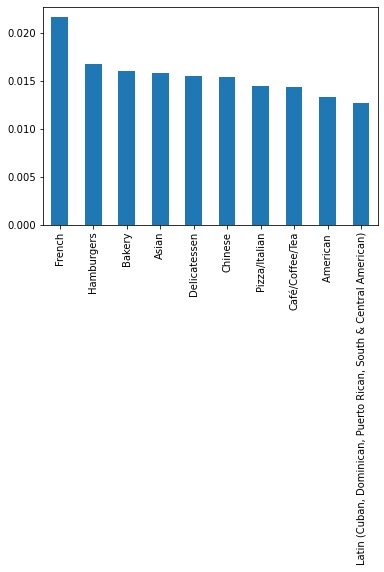

In [223]:
merged2.sort_values(by="Clean Ratio",ascending=False)[0:10]['Clean Ratio'].plot(kind='bar')

<font face="Tahoma" size = 3>Q11. What are the most common violations in each borough?

In [242]:
df_ct = pd.crosstab(index =df["VIOLATION CODE"],columns=df['BORO'])
df_ct.sort_values('BRONX',ascending=False)[0:10]

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
VIOLATION CODE,,,,,,
10F,500,1485,2417,8,1416,230
08A,452,1242,1890,2,1107,128
04L,313,937,1228,1,776,103
02B,193,597,831,1,567,94
04N,178,392,881,1,388,46
02G,168,635,1232,1,621,118
06D,156,615,1203,6,619,119
06C,156,679,1072,0,689,90
10B,149,490,861,0,502,91


In [243]:
df_ct.sort_values('BROOKLYN',ascending=False)[0:10]

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
VIOLATION CODE,,,,,,
10F,500,1485,2417,8,1416,230
08A,452,1242,1890,2,1107,128
04L,313,937,1228,1,776,103
06C,156,679,1072,0,689,90
02G,168,635,1232,1,621,118
06D,156,615,1203,6,619,119
02B,193,597,831,1,567,94
10B,149,490,861,0,502,91
04N,178,392,881,1,388,46


In [244]:
df_ct.sort_values('MANHATTAN',ascending=False)[0:10]

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
VIOLATION CODE,,,,,,
10F,500,1485,2417,8,1416,230
08A,452,1242,1890,2,1107,128
02G,168,635,1232,1,621,118
04L,313,937,1228,1,776,103
06D,156,615,1203,6,619,119
06C,156,679,1072,0,689,90
04N,178,392,881,1,388,46
10B,149,490,861,0,502,91
02B,193,597,831,1,567,94


In [245]:
df_ct.sort_values('QUEENS',ascending=False)[0:10]

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
VIOLATION CODE,,,,,,
10F,500,1485,2417,8,1416,230
08A,452,1242,1890,2,1107,128
04L,313,937,1228,1,776,103
06C,156,679,1072,0,689,90
02G,168,635,1232,1,621,118
06D,156,615,1203,6,619,119
02B,193,597,831,1,567,94
10B,149,490,861,0,502,91
04N,178,392,881,1,388,46


In [246]:
df_ct.sort_values('STATEN ISLAND',ascending=False)[0:10]

BORO,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
VIOLATION CODE,,,,,,
10F,500,1485,2417,8,1416,230
08A,452,1242,1890,2,1107,128
06D,156,615,1203,6,619,119
02G,168,635,1232,1,621,118
04L,313,937,1228,1,776,103
02B,193,597,831,1,567,94
10B,149,490,861,0,502,91
06C,156,679,1072,0,689,90
04N,178,392,881,1,388,46


In [247]:
df_ct.idxmax()

BORO
BRONX            10F
BROOKLYN         10F
MANHATTAN        10F
Missing          10F
QUEENS           10F
STATEN ISLAND    10F
dtype: object

<font face="Tahoma" size = 3>Q12. What are the most common violations per borough, after normalizing for the relative abundance of each violation?

Get overall frequencies: Figure out how common each violation is, over
the entire dataset; let’s call this violationFrequency.

In [250]:
overall_violations = df['VIOLATION CODE'].value_counts().to_frame()
overall_violations

,VIOLATION CODE
10F,6056
08A,4821
04L,3358
02G,2775
06D,2718
...,...
03E,2
15E,2
03G,1
16E,1


Normalize: Consider the table of number of violations by boro that
you created for the previous question. For each borough, divide the
number of violations of each type by the total number of violations for
that type; i.e., divide the series of violations by violationFrequency.
We want to do this for each borough.

In [258]:
merged3 = df_ct.merge(overall_violations,how="left",left_index=True,right_index=True).rename(columns={"VIOLATION CODE":"Total"})
merged3

,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,Total
VIOLATION CODE,,,,,,,
02A,1,11,18,0,7,1,38
02B,193,597,831,1,567,94,2283
02C,8,24,18,0,25,0,75
02D,0,5,2,0,0,0,7
02F,0,0,1,0,1,0,2
...,...,...,...,...,...,...,...
22A,6,37,63,0,38,2,146
22B,1,5,7,0,2,1,16
22C,20,93,168,0,80,10,371


In [265]:
cols = merged3.columns[merged3.columns != "Total"]
cols.values

array(['BRONX', 'BROOKLYN', 'MANHATTAN', 'Missing', 'QUEENS',
       'STATEN ISLAND'], dtype=object)

In [268]:
merged3.loc[:,cols.values] = merged3.loc[:,cols.values].div(merged3['Total'], axis=0)

In [272]:
merged3.drop("Total",axis=1)

,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND
VIOLATION CODE,,,,,,
02A,0.026316,0.289474,0.473684,0.000000,0.184211,0.026316
02B,0.084538,0.261498,0.363995,0.000438,0.248357,0.041174
02C,0.106667,0.320000,0.240000,0.000000,0.333333,0.000000
02D,0.000000,0.714286,0.285714,0.000000,0.000000,0.000000
02F,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000
...,...,...,...,...,...,...
22A,0.041096,0.253425,0.431507,0.000000,0.260274,0.013699
22B,0.062500,0.312500,0.437500,0.000000,0.125000,0.062500
22C,0.053908,0.250674,0.452830,0.000000,0.215633,0.026954


Now, after this normalization, for each
borough, figure out the most common violation description

In [274]:
merged3.sort_values('BRONX',ascending=False)[0:10]

,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,Total
VIOLATION CODE,,,,,,,
04I,0.500000,0.000000,0.500000,0.0,0.000000,0.000000,2
15K,0.454545,0.181818,0.000000,0.0,0.363636,0.000000,11
07A,0.250000,0.375000,0.250000,0.0,0.125000,0.000000,8
15S,0.210526,0.315789,0.210526,0.0,0.263158,0.000000,19
04F,0.200000,0.400000,0.200000,0.0,0.200000,0.000000,5
15J,0.181818,0.181818,0.227273,0.0,0.363636,0.045455,22
18F,0.166667,0.111111,0.611111,0.0,0.111111,0.000000,36
05C,0.166667,0.166667,0.500000,0.0,0.166667,0.000000,6
04K,0.128205,0.298077,0.426282,0.0,0.134615,0.012821,312


In [275]:
merged3.sort_values('BROOKLYN',ascending=False)[0:10]

,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,Total
VIOLATION CODE,,,,,,,
02D,0.000000,0.714286,0.285714,0.0,0.000000,0.000000,7
18C,0.000000,0.666667,0.333333,0.0,0.000000,0.000000,3
10G,0.000000,0.625000,0.000000,0.0,0.375000,0.000000,8
04B,0.000000,0.500000,0.166667,0.0,0.333333,0.000000,6
20A,0.051282,0.410256,0.358974,0.0,0.179487,0.000000,39
03A,0.032787,0.409836,0.360656,0.0,0.180328,0.016393,61
05F,0.067797,0.406780,0.203390,0.0,0.288136,0.033898,59
03D,0.000000,0.400000,0.400000,0.0,0.200000,0.000000,5
04F,0.200000,0.400000,0.200000,0.0,0.200000,0.000000,5


In [276]:
merged3.sort_values('MANHATTAN',ascending=False)[0:10]

,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,Total
VIOLATION CODE,,,,,,,
03E,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,2
15E,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,2
20E,0.000000,0.214286,0.714286,0.0,0.071429,0.000000,28
20B,0.000000,0.000000,0.666667,0.0,0.333333,0.000000,3
22F,0.000000,0.166667,0.625000,0.0,0.208333,0.000000,24
18F,0.166667,0.111111,0.611111,0.0,0.111111,0.000000,36
06G,0.000000,0.294118,0.588235,0.0,0.117647,0.000000,17
02I,0.000000,0.111111,0.555556,0.0,0.333333,0.000000,9
05E,0.100000,0.150000,0.550000,0.0,0.150000,0.050000,20


In [277]:
merged3.sort_values('QUEENS',ascending=False)[0:10]

,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,Total
VIOLATION CODE,,,,,,,
03G,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1
05B,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1
16E,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1
02F,0.000000,0.000000,0.500000,0.0,0.500000,0.000000,2
04E,0.041667,0.166667,0.312500,0.0,0.416667,0.062500,48
16A,0.079365,0.190476,0.301587,0.0,0.380952,0.047619,63
10G,0.000000,0.625000,0.000000,0.0,0.375000,0.000000,8
15J,0.181818,0.181818,0.227273,0.0,0.363636,0.045455,22
15K,0.454545,0.181818,0.000000,0.0,0.363636,0.000000,11


In [278]:
merged3.sort_values('STATEN ISLAND',ascending=False)[0:10]

,BRONX,BROOKLYN,MANHATTAN,Missing,QUEENS,STATEN ISLAND,Total
VIOLATION CODE,,,,,,,
03C,0.000000,0.272727,0.363636,0.000000,0.272727,0.090909,11
10C,0.100000,0.328571,0.328571,0.000000,0.171429,0.071429,70
03B,0.000000,0.344828,0.275862,0.000000,0.310345,0.068966,29
04E,0.041667,0.166667,0.312500,0.000000,0.416667,0.062500,48
22B,0.062500,0.312500,0.437500,0.000000,0.125000,0.062500,16
16C,0.000000,0.250000,0.375000,0.000000,0.312500,0.062500,16
15I,0.058824,0.294118,0.352941,0.000000,0.235294,0.058824,17
09B,0.085714,0.259524,0.359524,0.002381,0.238095,0.054762,420
10E,0.069307,0.250825,0.323432,0.000000,0.303630,0.052805,303


In [279]:
merged3.idxmax()

BRONX            04I
BROOKLYN         02D
MANHATTAN        03E
Missing          10J
QUEENS           03G
STATEN ISLAND    03C
Total            10F
dtype: object

<font face="Tahoma" size = 3>Q13. How many phone area codes correspond to a single
zipcode?

In [288]:
df['PHONE SUB'] = df['PHONE'].str[0:3]
df['ZIPCODE SUB'] = df['ZIPCODE'].str[0:3]

In [305]:
df['PHONE SUB'].nunique()

56

In [301]:
temp_df = df[['PHONE SUB','ZIPCODE SUB']]
temp_df = temp_df.drop_duplicates()
(temp_df['PHONE SUB'].value_counts().to_frame()['PHONE SUB'] == 1).sum()

40

<font face="Tahoma" size = 3>Q14. Find common misspellings of street names 

Create a new column, called STREET TYPE, which is the the last word
in the name of the street. For example, if the street is “Astoria Boulevard”, the street type should be “Boulevard”

In [324]:
df['STREET TYPE'] = [val[-1] for val in df['STREET'].str.split(' ')]

In [326]:
df['STREET BASE'] = [val[:-1] for val in df['STREET'].str.split(' ')]

Create another column, called STREET BASE, which contains everything
but the last word in the name of the street. For example, if the street
is “Astoria Boulevard”, the street base should be “Astoria”.

In [328]:
df['STREET BASE'] = df['STREET BASE'].str.join(" ")

In [329]:
df['STREET BASE']

0         FLATBUSH
1         FLATBUSH
2         FLATBUSH
3         FLATBUSH
4         FLATBUSH
           ...    
44628    MANHATTAN
44629       E 13TH
44630       E 13TH
44631       E 13TH
44632       E 13TH
Name: STREET BASE, Length: 44633, dtype: object

Create a third column, called STREET BASE & ZIP, that combines the
street base and the zipcode.

In [332]:
df['STREET BASE & ZIP'] = df['STREET BASE'] +" "+ df['ZIPCODE']

In [333]:
df['STREET BASE & ZIP']

0         FLATBUSH 11225
1         FLATBUSH 11225
2         FLATBUSH 11225
3         FLATBUSH 11225
4         FLATBUSH 11225
              ...       
44628    MANHATTAN 11222
44629       E 13TH 10009
44630       E 13TH 10009
44631       E 13TH 10009
44632       E 13TH 10009
Name: STREET BASE & ZIP, Length: 44633, dtype: object

Create a table containing just these three columns, and remove any
duplicates or instances where street base is empty. This table now
contains unique street names, along with the street type.

In [334]:
df_streets = df[['STREET TYPE','STREET BASE','STREET BASE & ZIP']]

In [336]:
df_streets.isnull().sum()

STREET TYPE          0
STREET BASE          0
STREET BASE & ZIP    0
dtype: int64

In [337]:
df_streets.shape

(44633, 3)

In [340]:
df_streets.dropna(how="any").drop_duplicates()

,STREET TYPE,STREET BASE,STREET BASE & ZIP
0,AVENUE,FLATBUSH,FLATBUSH 11225
5,ROAD,63,63 11374
9,BOULEVARD,ASTORIA,ASTORIA 11369
16,AVENUE,SUTTER,SUTTER 11208
22,HIGHWAY,KINGS,KINGS 11223
...,...,...,...
44613,ST,9TH,9TH 11101
44617,AVE,ROGERS,ROGERS 11216
44618,,GRAND AVE,GRAND AVE ...
44619,ST,E 48TH,E 48TH 10017


Merge this table with itself, on the STREET BASE & ZIP column. Thus,
in the new merged tabled, we will have two STREET TYPE fields for
each street base and zipcode. 

In [341]:
merged_street = df_streets.merge(df_streets,on = "STREET BASE & ZIP")

In [342]:
merged_street[:3]

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
0,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
1,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH
2,AVENUE,FLATBUSH,FLATBUSH 11225,AVENUE,FLATBUSH


From the merged table, select only the rows where the street types are
different

In [344]:
diff_street_type = merged_street[merged_street['STREET TYPE_x']!=merged_street['STREET TYPE_y']]
diff_street_type

,STREET TYPE_x,STREET BASE_x,STREET BASE & ZIP,STREET TYPE_y,STREET BASE_y
1300,ROAD,63,63 11374,DRIVE,63
1301,ROAD,63,63 11374,DRIVE,63
1302,ROAD,63,63 11374,DRIVE,63
1303,ROAD,63,63 11374,DRIVE,63
1304,ROAD,63,63 11374,DRIVE,63
...,...,...,...,...,...
1748286,AVENUE,48,48 11101,STREET,48
1748287,AVENUE,48,48 11101,STREET,48
1748294,AVENUE,48,48 11101,STREET,48
1748295,AVENUE,48,48 11101,STREET,48


Now, do a cross-tabulation of the two distinct street types (check out
the crosstab function in Pandas). This gives us the number of times
Ave and Avenue were used with the same STREET BASE & ZIP.

In [347]:
diff_street_type2 = pd.crosstab(diff_street_type['STREET TYPE_x'],diff_street_type['STREET TYPE_y'])
diff_street_type2

STREET TYPE_y,A,AAVENUE,AIRPORT,AVE,AVENUE,B,BLVD,BOULEARD,BOULEVARD,BOWERY,...,STREET,TERM8-A1,TERMINAL,TPKE,TURNPIKE,U,V,W,WEST,X
STREET TYPE_x,,,,,,,,,,,,,,,,,,,,,
A,0,0,0,0,0,7494,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAVENUE,0,0,0,12,150,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AIRPORT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVE,0,12,0,0,46901,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AVENUE,0,150,0,46901,0,0,0,0,0,0,...,957,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
U,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,762,0,0,882
V,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,762,0,0,0,0
W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,344,0


From this cross-tabulation table, find the most commonly street type
that occurs with each of the following: AVE, ST, RD, PL, BOULEARD,
and BULEVARD.

In [349]:
diff_street_type2[['AVE','ST','RD','PL','BOULEARD','BULEVARD']].idxmax()

STREET TYPE_y
AVE            AVENUE
ST             STREET
RD               ROAD
PL              PLACE
BOULEARD    BOULEVARD
BULEVARD    BOULEVARD
dtype: object